In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv('exchange_rate.csv')
df.head()


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


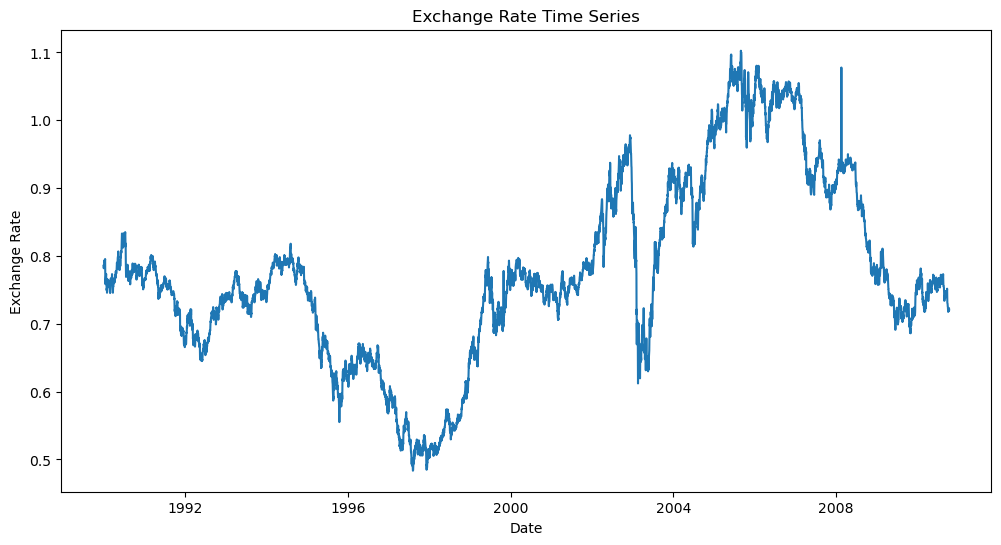

In [11]:
 #Part 1: Data Preparation and Exploration

# 1. Data Loading
# Load the dataset and parse the date column.  Adjust date format if necessary
df = pd.read_csv('exchange_rate.csv')
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y %H:%M') #Replace '%d-%m-%Y %H:%M' with your date format if needed
df = df.set_index('date')

# 2. Initial Exploration
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'])  # Assuming 'Ex_rate' is the column name for the exchange rate
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


# 3. Data Preprocessing (Example - handling missing values with linear interpolation)
df['Ex_rate'] = df['Ex_rate'].interpolate(method='linear') #Replace with your method



C:\Users\Surbhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Surbhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Surbhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


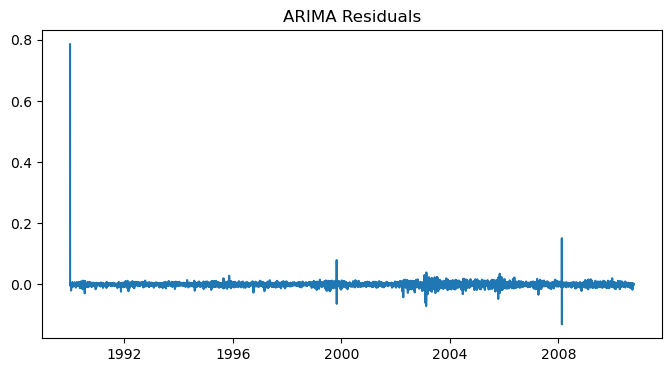

In [12]:
# Part 2: Model Building - ARIMA

# 1. Parameter Selection for ARIMA (Illustrative example - adjust based on ACF/PACF)
p, d, q = 5, 1, 0  # Replace with values determined from ACF/PACF plots

# 2. Model Fitting
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))
results_arima = model_arima.fit()

# 3. Diagnostics (Analyze the residuals)
residuals = results_arima.resid
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.title('ARIMA Residuals')
plt.show()

# 4. Forecasting
forecast_steps = 30  # Forecast the next 30 periods
forecast_arima = results_arima.get_forecast(steps=forecast_steps)
predicted_mean = forecast_arima.predicted_mean
conf_int = forecast_arima.conf_int()

In [13]:
# Part 3: Model Building - Exponential Smoothing

# 1. Model Selection
# Choose a suitable Exponential Smoothing model
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12) #Illustrative example.  Try add, mult, or none

# 2. Parameter Optimization (Illustrative - use grid search or AIC if needed)

# 3. Model Fitting and Forecasting
results_es = model_es.fit()
forecast_es = results_es.forecast(forecast_steps)

# Part 4: Evaluation and Comparison

# Split into training and test sets to fairly assess model
train_data = df[:int(0.8*(len(df)))]
test_data = df[int(0.8*(len(df))):]

# 1. Compute Error Metrics (MAE, RMSE, MAPE)

# Evaluate on test data
#ARIMA predictions
y_pred_arima = results_arima.predict(start=len(train_data), end = len(df)-1)
mae_arima = mean_absolute_error(test_data, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(test_data, y_pred_arima))
#Calculate MAPE - if values are near zero, MAPE can be skewed, so add a small amount
mape_arima = np.mean(np.abs((test_data - y_pred_arima) / (test_data + 1e-6))) * 100


#Exponential smoothing predictions
y_pred_es = results_es.predict(start=len(train_data), end = len(df)-1)
mae_es = mean_absolute_error(test_data, y_pred_es)
rmse_es = np.sqrt(mean_squared_error(test_data, y_pred_es))
#Calculate MAPE
mape_es = np.mean(np.abs((test_data - y_pred_es) / (test_data + 1e-6))) * 100

# 2. Model Comparison (Print the results)
print("ARIMA")
print('MAE:', mae_arima)
print('RMSE:', rmse_arima)
print('MAPE:', mape_arima)

print("\nExponential Smoothing")
print('MAE:', mae_es)
print('RMSE:', rmse_es)
print('MAPE:', mape_es)


C:\Users\Surbhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA
MAE: 0.0033395865288814624
RMSE: 0.00690820469496091
MAPE: nan

Exponential Smoothing
MAE: 0.003332832040093167
RMSE: 0.006901697391427566
MAPE: nan
